In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_1.2.csv", names=["deg", "N"])
data

,deg,N
0,0.0,901
1,5.0,945
2,10.0,904
3,20.0,840
4,30.0,797
5,40.0,729
6,50.0,639
7,60.0,562
8,70.0,474
9,80.0,435


In [3]:
sigma_phi = 0.5 / 90 * np.pi / 2.
sigma_N = 5.

X = (1. - np.cos(data.deg / 90. * np.pi / 2)).values
sigma_X = np.abs(np.sin(data.deg / 90.* np.pi / 2.) * sigma_phi).values
Y = (1. / data.N).values
sigma_Y = np.abs(1. / data.N**2. * sigma_N).values

In [4]:
A = np.vstack([X, np.ones(len(X))]).T

In [5]:
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]

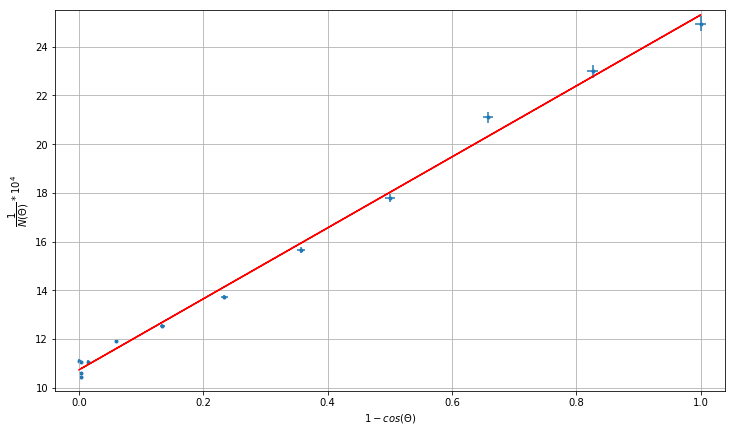

In [6]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()

plt.scatter(X, Y * 10 ** 4, marker=".")
plt.errorbar(X, Y * 10 ** 4, xerr=sigma_X, yerr=sigma_Y * 10 ** 4, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min())  * 10 ** 4 / len(Y)

ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() * 10 ** 4 - delta_y/2), Y.max() * 10 ** 4 + delta_y/2)
# plt.title("$\dfrac{1}{N(\Theta)} = f(\Theta)$")
plt.xlabel("$1-cos(\Theta)$")
plt.ylabel("$\dfrac{1}{N(\Theta)} * 10^4$")

plt.plot(X, (m*X + c) * 10 ** 4, 'r', label='Fitted line')
plt.grid(True)
plt.savefig("graph_1.png")

In [102]:
data["X"] = X
data["Y"] = Y
data["$\sigma(X)$"] = sigma_X
data["$\sigma(Y)$"] = sigma_Y

In [103]:
print(data.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &   deg &    N &         X &         Y &  \$\textbackslash sigma(X)\$ &  \$\textbackslash sigma(Y)\$ \\
\midrule
0  &   0.0 &  901 &  0.000000 &  0.001110 &     0.000000 &     0.000006 \\
1  &   5.0 &  945 &  0.003805 &  0.001058 &     0.000761 &     0.000006 \\
2  &  10.0 &  904 &  0.015192 &  0.001106 &     0.001515 &     0.000006 \\
3  &  20.0 &  840 &  0.060307 &  0.001190 &     0.002985 &     0.000007 \\
4  &  30.0 &  797 &  0.133975 &  0.001255 &     0.004363 &     0.000008 \\
5  &  40.0 &  729 &  0.233956 &  0.001372 &     0.005609 &     0.000009 \\
6  &  50.0 &  639 &  0.357212 &  0.001565 &     0.006685 &     0.000012 \\
7  &  60.0 &  562 &  0.500000 &  0.001779 &     0.007557 &     0.000016 \\
8  &  70.0 &  474 &  0.657980 &  0.002110 &     0.008200 &     0.000022 \\
9  &  80.0 &  435 &  0.826352 &  0.002299 &     0.008594 &     0.000026 \\
10 &  90.0 &  401 &  1.000000 &  0.002494 &     0.008727 &     0.000031 \\
11 &  -5.0 &  906 &  0.00